# 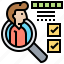 Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning
*Wika Rabila Putri (DS 41 & JAP 28)*


## Overview
Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui perilaku customer personality nya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada customers yang berpotensi menjadi loyal customers. Dengan mengolah data historical marketing campaign guna menaikkan performa dan menyasar customers yang tepat agar dapat bertransaksi di platform perusahaan, dari insight data tersebut fokus kita adalah membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan.

## Tujuan:

Mengidentifikasi ideal customer untuk memaksimalkan jangkauan pemasaran.

## Objective:

Membangun model cluster dan membangun strategi bisnis untuk mengoptimalkan kampanye pemasaran perusahaan.

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import date
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
#import dataset

df = pd.read_csv(r'C:\Users\Wika Rabila Putri\Documents\Documents Lenovo\Rakamin\JAP\MINPRO 3 Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning\marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
351,351,175,1986,S1,Menikah,71952000.0,1,0,10-01-2013,93,...,4,1,0,1,0,0,0,3,11,0
499,499,466,1944,S1,Menikah,65275000.0,0,0,03-04-2013,9,...,2,0,0,0,0,0,0,3,11,0
526,526,4322,1958,S3,Bertunangan,77863000.0,0,0,27-11-2013,20,...,2,0,0,0,0,0,0,3,11,0
2193,2193,8722,1957,D3,Menikah,82347000.0,0,0,06-11-2012,38,...,3,1,0,0,1,0,0,3,11,1
1841,1841,6906,1953,S2,Janda,84953000.0,0,0,03-06-2013,73,...,2,0,1,1,1,0,0,3,11,1


In [3]:
#statistik

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [6]:
#cek missing values

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
#cek data duplikat

num_duplicates = df.duplicated().sum()
print(f'Jumlah data duplikat: {num_duplicates}')

Jumlah data duplikat: 0


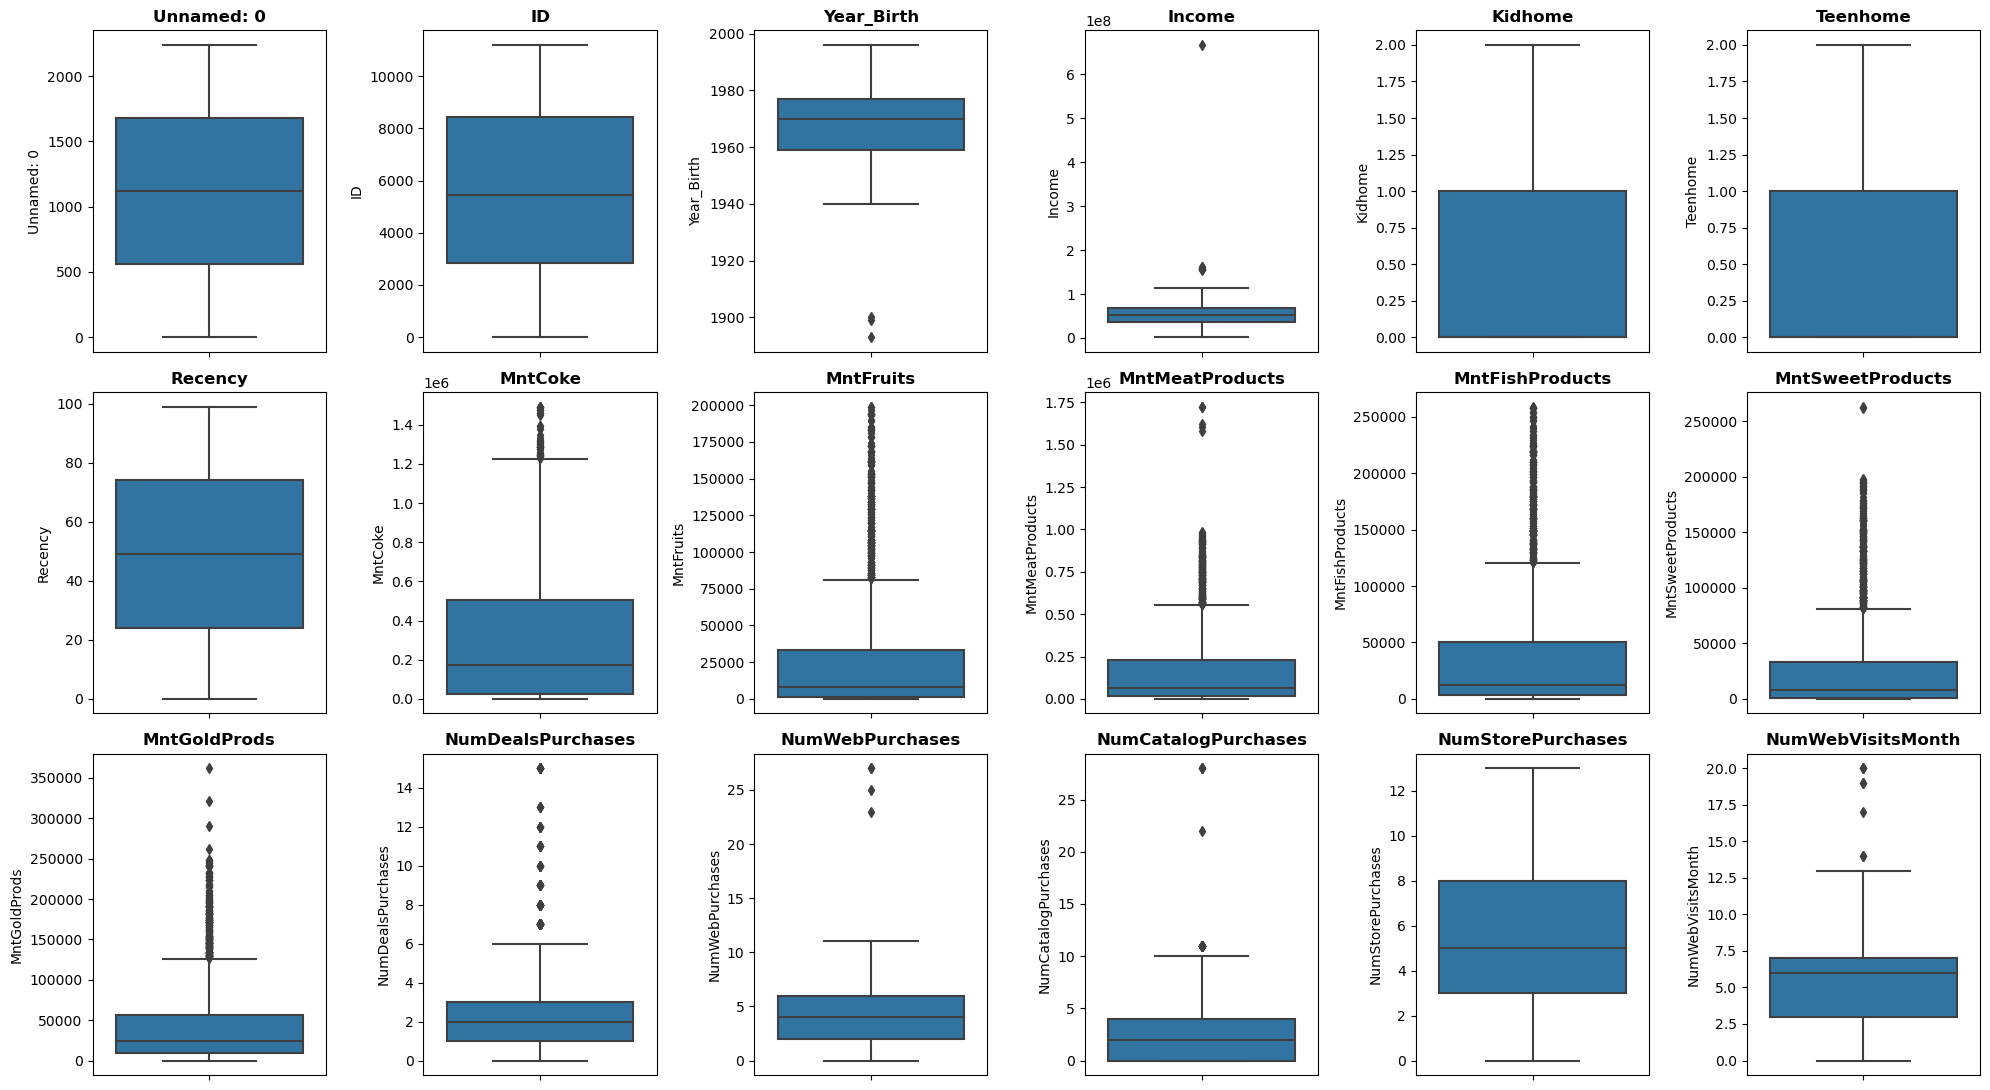

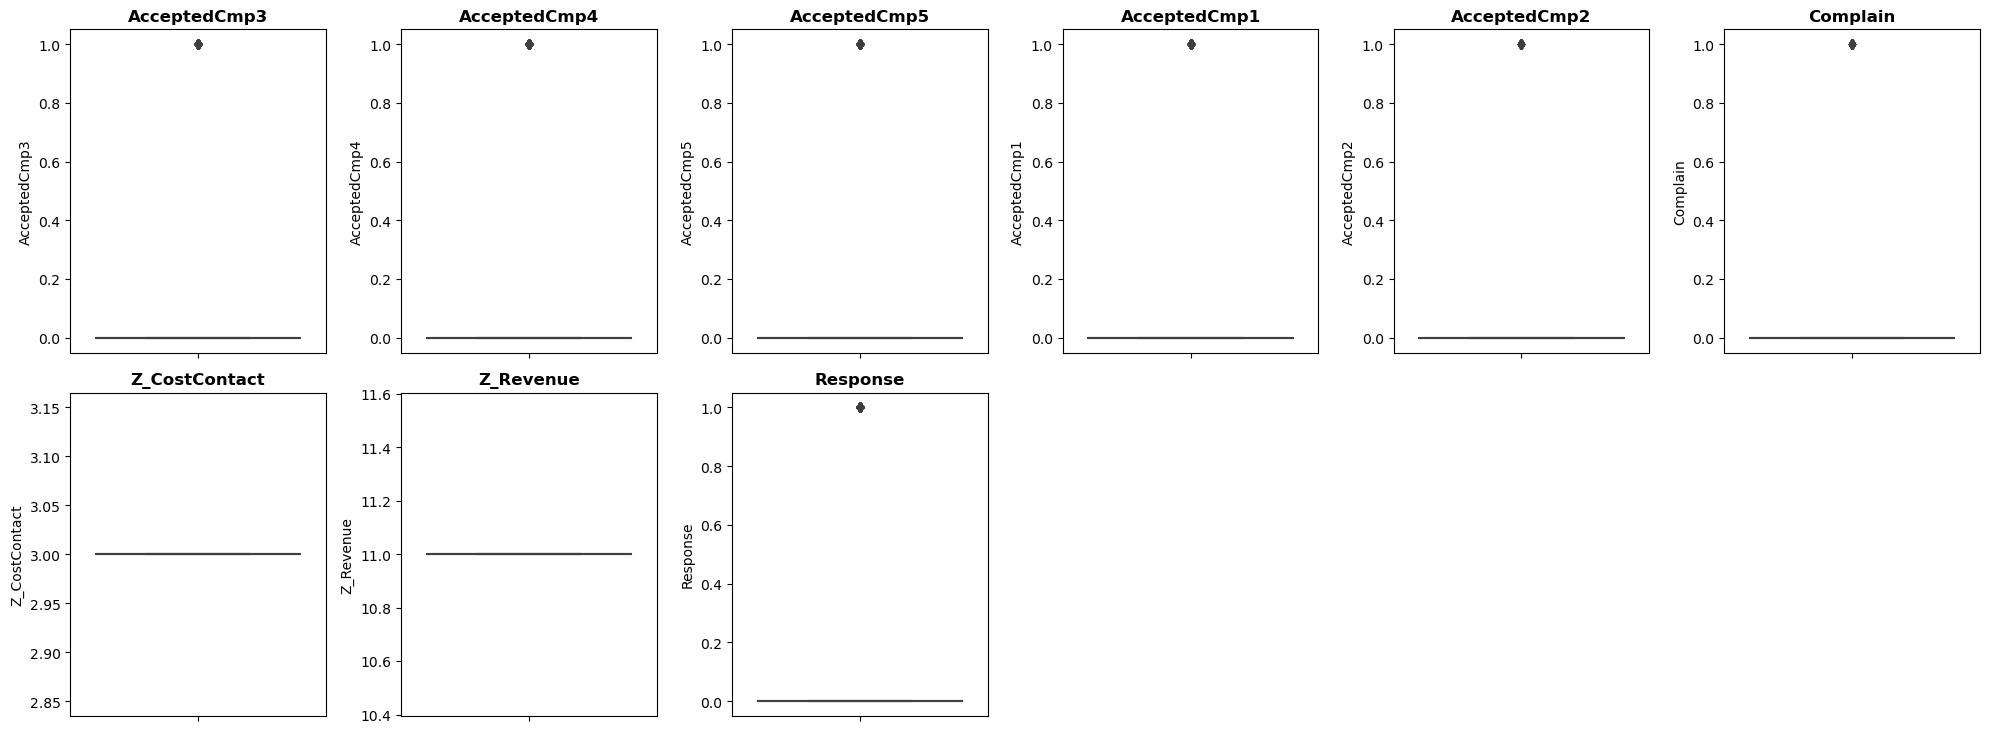

In [8]:
#cek outlier

nums = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ---------------------------------------------------------------------------------------------------------------------

num_plots_per_figure = 18

num_figures = (len(nums) // num_plots_per_figure) + 1

for f in range(num_figures):
    plt.figure(figsize=(20, 11))
    for i in range(num_plots_per_figure):
        index = f * num_plots_per_figure + i
        if index < len(nums):
            plt.subplot(3, 6, i + 1)
            sns.boxplot(y=df[nums[index]], orient='v')
            plt.title(nums[index], fontsize=12, fontweight='bold')
            plt.tight_layout()
    plt.show()

- Terdapat 2240 data dengan 30 kolom/fitur

- Tipe data terdiri dari float64, int64, dan object

- Terdapat 24 null value pada fitur Income

- Tidak ada data yang duplikat

- Data cenderung memiliki outlier

Nanti akan dilakukan proses data cleaning dan feature engineering. Tujuannya adalah untuk menciptakan fitur baru seperti conversion rate, serta menggali informasi dari fitur-fitur lain seperti age, income, dan pola spending. Dengan menggunakan fitur-fitur ini, diharapkan dapat mengidentifikasi pola perilaku customer yang memberikan wawasan berharga dalam analisis conversion rate.

# 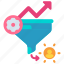 TASK 1: Conversion Rate Analysis Based On Income, Spending And Age

## Data Cleaning

In [9]:
df_copy = df.copy()

In [10]:
df_copy.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
#handling missing value

df_copy.fillna(df_copy['Income'].median(), inplace=True)

In [12]:
df_copy.isna().sum().sum()

0

In [13]:
#handling outlier

print(f'Before handle outlier: {len(df_copy)}')

filtered_entries = np.array([True] * len(df_copy))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_copy[col] >= low_limit) & (df_copy[col] <= high_limit)) & filtered_entries
    
df_copy = df_copy[filtered_entries]

print(f'After handle outlier: {len(df_copy)}')

Before handle outlier: 2240
After handle outlier: 1861


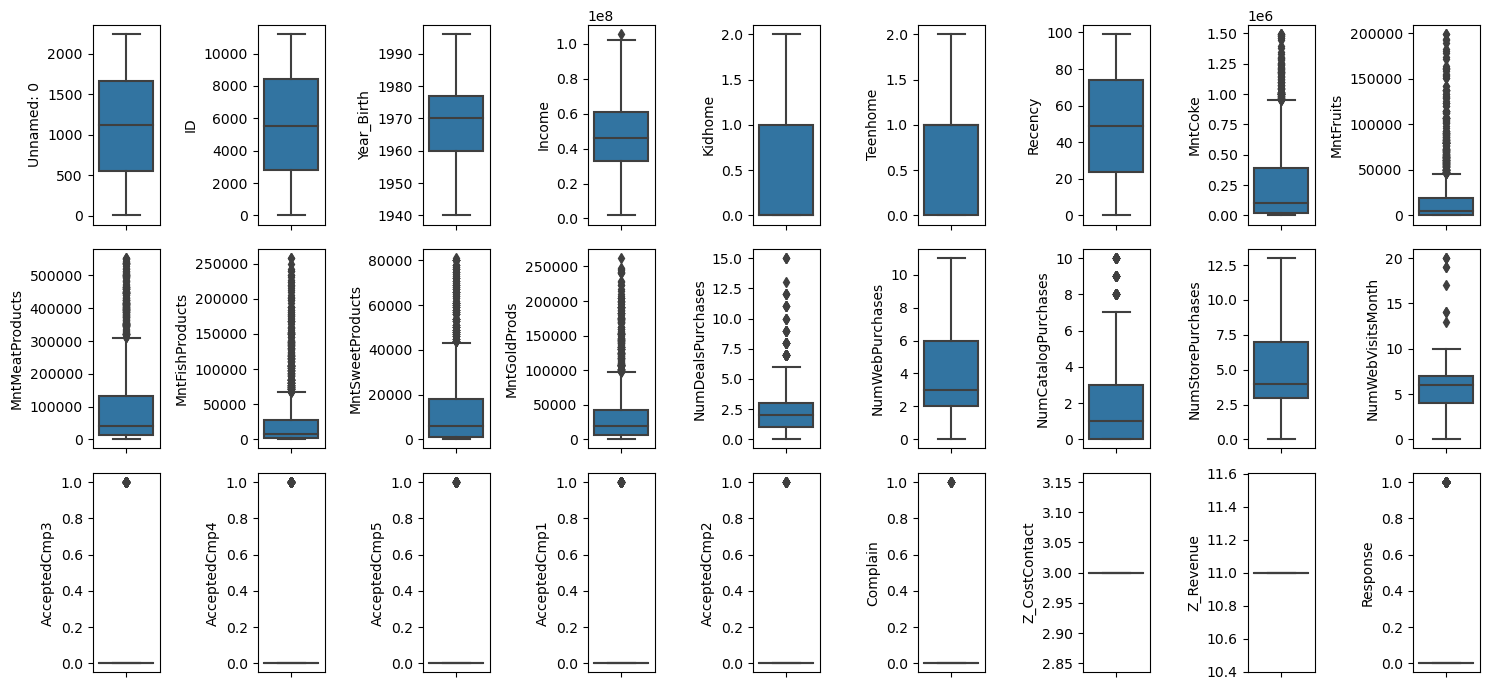

In [14]:
#after handling outlier

nums = df_copy.loc[:, (df_copy.dtypes == 'int64') | (df_copy.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df_copy[nums[i]], orient='v')
    plt.tight_layout()

Penanganan outlier penting dilakukan dalam analisis data untuk memastikan integritas dan representasi yang tepat dari data. Hal ini dapat meningkatkan keakuratan analisis statistik dan model yang dibangun dari data tersebut.

## Feature Engineering

In [15]:
#membuat kolom membership duration

#convert ke datetime
df_copy['Dt_Customer'] = pd.to_datetime(df_copy['Dt_Customer'], format='%d-%m-%Y')

df_copy['Membership_Duration'] = 2024 - df_copy['Dt_Customer'].dt.year

In [16]:
df_copy['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

In [17]:
#membuat kolom usia
df_copy['Age'] = 2024 - df_copy['Year_Birth']

print(f'min age: {df_copy.Age.min()}')
print(f'max age: {df_copy.Age.max()}')

min age: 28
max age: 84


In [18]:
#membuat kategori berdasarkan usia
df_copy['Age_Categories'] = np.where(df_copy['Age'] < 40, 'Young Adult',
                      np.where(df_copy['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [19]:
#membuat kolom total anak
df_copy['Total_Children'] = df_copy['Kidhome'] + df_copy['Teenhome']

df_copy['Total_Children'].value_counts()

Total_Children
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

In [20]:
#membuat total transaksi

df_copy['Total_Transaction'] = df_copy['NumDealsPurchases'] + df_copy['NumWebPurchases'] + df_copy['NumCatalogPurchases'] + df_copy['NumStorePurchases']
df_copy['Total_Transaction'].value_counts()

Total_Transaction
7     149
5     145
4     127
6     122
9     102
8      94
17     90
16     81
10     80
21     70
12     68
20     67
11     65
15     63
19     60
23     59
22     56
18     53
14     48
25     45
26     43
13     40
24     36
27     27
28     25
32     11
29      9
31      9
30      7
2       2
1       2
0       2
34      2
35      1
33      1
Name: count, dtype: int64

In [21]:
#membuat kolom total spending

df_copy['Total_Spending'] = df_copy['MntCoke'] + df_copy['MntFruits'] + df_copy['MntMeatProducts'] + df_copy['MntFishProducts'] + df_copy['MntSweetProducts'] + df_copy['MntGoldProds']
df_copy['Total_Spending'].value_counts()

Total_Spending
46000      19
22000      17
57000      16
55000      15
44000      15
           ..
683000      1
714000      1
1245000     1
779000      1
843000      1
Name: count, Length: 815, dtype: int64

In [22]:
#membuat kolom total accepted campaign

df_copy['Total_Accepted_Campaign'] = df_copy['AcceptedCmp1'] + df_copy['AcceptedCmp2'] + df_copy['AcceptedCmp3'] + df_copy['AcceptedCmp4'] + df_copy['AcceptedCmp5']
df_copy['Total_Accepted_Campaign'].value_counts()

Total_Accepted_Campaign
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

## Conversion Rate

In [23]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df_copy['Conversion_Rate'] = round(df_copy.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

df_copy['Conversion_Rate'].value_counts()

Conversion_Rate
1.00    121
2.00     61
3.00     43
0.71     43
4.00     42
       ... 
0.84      1
2.44      1
6.75      1
5.83      1
3.38      1
Name: count, Length: 166, dtype: int64

## EDA

In [24]:
df_copy_1 = df_copy.copy()

In [25]:
#fitur numerik
nums = df_copy_1.loc[:, (df_copy_1.dtypes == 'int64') | (df_copy_1.dtypes == float)].columns.tolist()
nums = nums[3:]
print(nums)
print(len(nums))

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'Conversion_Rate']
30


In [26]:
#fitur kategorikal
cats = df_copy_1.loc[:, (df_copy_1.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


In [27]:
#statistik numerik

n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'Conversion_Rate']
df_copy_1[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1861.0,46995965.88,18565693.78,1730000.0,33178000.00,46102000.0,61209000.0,105471000.0
Recency,1861.0,48.68,28.94,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1861.0,10.96,0.68,10.0,10.00,11.0,11.0,12.0
Age,1861.0,55.00,11.47,28.0,47.00,54.0,64.0,84.0
Total_Children,1861.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1861.0,13.57,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1861.0,440856.53,477667.79,5000.0,57000.00,231000.0,734000.0,2231000.0
Total_Accepted_Campaign,1861.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
Conversion_Rate,1861.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


- Income: Rata-rata pendapatan customer adalah sekitar 46.995.965 dengan variasi yang signifikan dari 1.730.000 hingga 105.471.000.

- Recency: customer rata-rata terakhir melakukan transaksi sekitar 48 hari yang lalu, dengan rentang dari 0 hingga 99 hari.

- Membership Duration: Rata-rata customer telah menjadi anggota selama sekitar 10,96 bulan (11 bulan), dengan sebagian besar customer berada dalam rentang 10 hingga 12 bulan.

- Age: Rata-rata usia customer adalah 55 tahun, dengan sebagian besar berusia antara 47 hingga 64 tahun.

- Total Children: Rata-rata jumlah anak dari customer adalah sekitar 1,08, dengan sebagian besar memiliki satu anak.

- Total Transaction: Rata-rata customer melakukan sekitar 13,57 transaksi (14 transaksi), dengan rentang dari 0 hingga 35 transaksi.

- Total Spending: Rata-rata total pengeluaran customer adalah 440.856,53, dengan variasi yang besar dari 5.000 hingga 2.231.000.

- Total Accepted Campaign: Rata-rata customer menerima sekitar 0,23 kampanye yang ditawarkan, dengan sebagian besar tidak menerima kampanye apapun.

- Conversion Rate: Rata-rata tingkat konversi customer adalah 3,29%, dengan sebagian besar customer memiliki tingkat konversi antara 1,12% hingga 4%.

In [28]:
df_copy_1[cats].describe().T

,count,unique,top,freq
Education,1861,5,S1,914
Marital_Status,1861,6,Menikah,725
Age_Categories,1861,3,Middle-Aged Adult,1045


- Education: Mayoritas memiliki latar belakang pendidikan S1, menunjukkan tingkat pendidikan yang relatif tinggi di antara responden.

- Marital_Status: Status "Menikah" dominan, mencerminkan mayoritas responden yang sudah menikah dalam dataset.

- Age_Categories: Kebanyakan responden tergolong dalam kategori "Middle-Aged Adult", menunjukkan distribusi usia yang cenderung ke tengah usia dewasa.

### Univariate Analysis

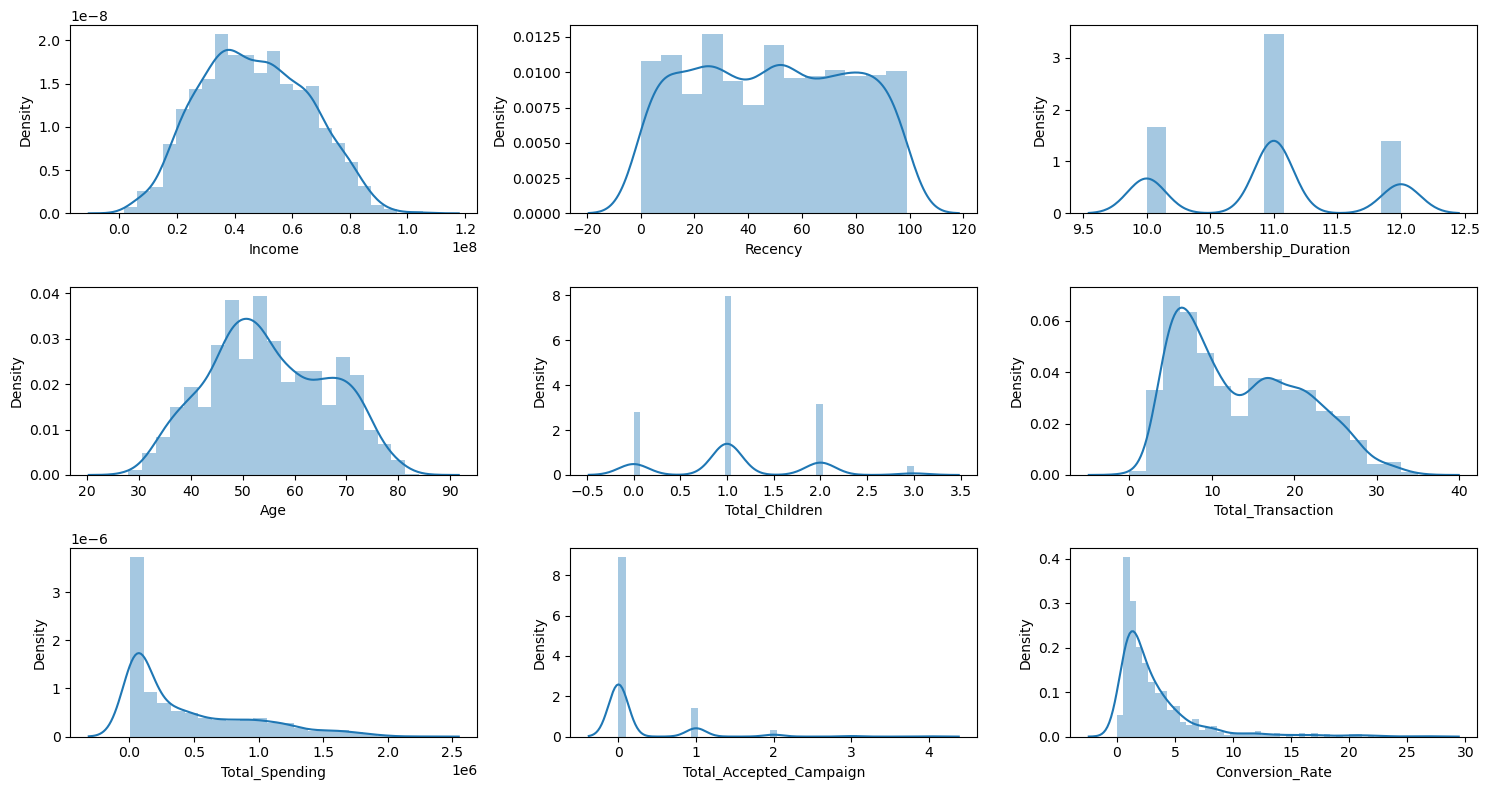

In [29]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(n_feats)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_copy_1[n_feats[i]])
    plt.tight_layout()

- Fitur Income, Recency, dan Age cenderung berdistribusi normal
- Fitur lainnya cenderung berdistribusi positive skewed

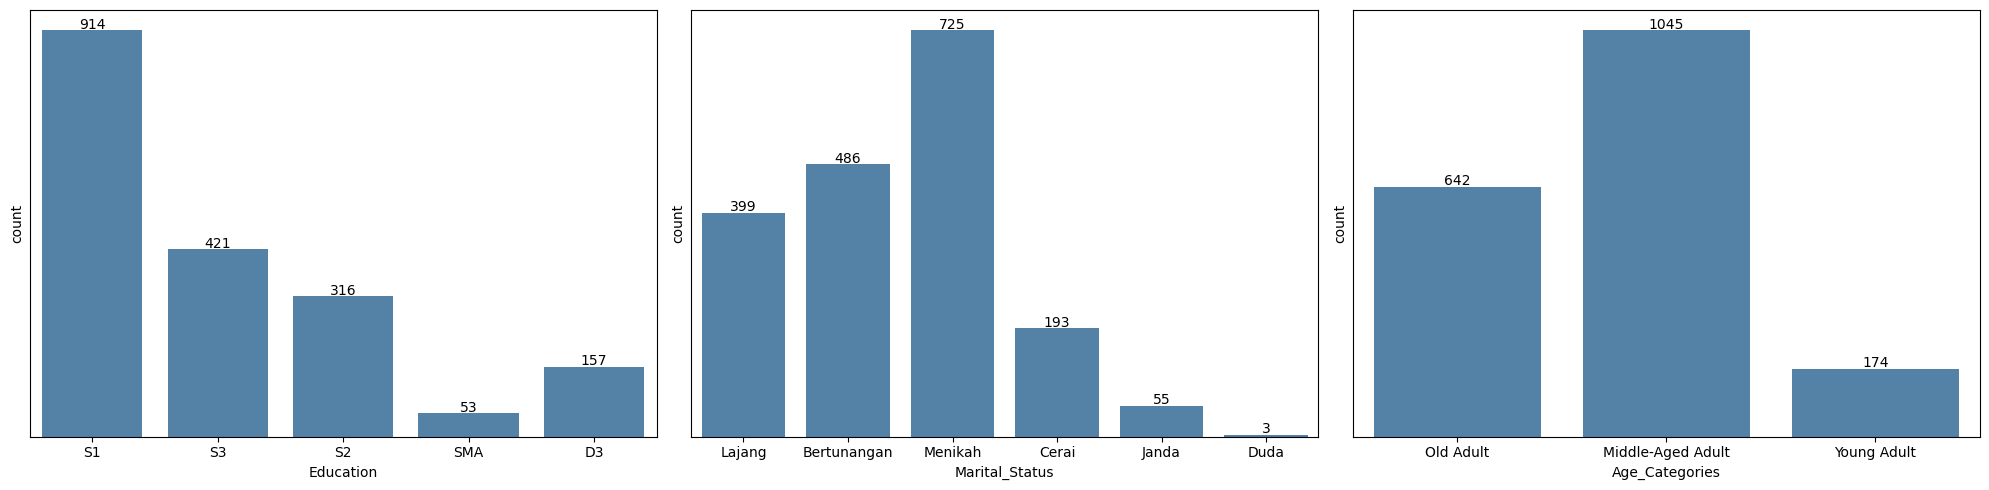

In [30]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=df_copy_1[cats[i]], color='steelblue')
    
    for a in ax.patches:
        txt = np.round(a.get_height())
        anot = txt.astype('int64')
        ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                    ha='center', va='top', xytext=(0, 9), textcoords='offset points')
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    plt.tight_layout()

### Bivariate Analysis

In [31]:
variable = ['Income', 'Total_Spending', 'Age']

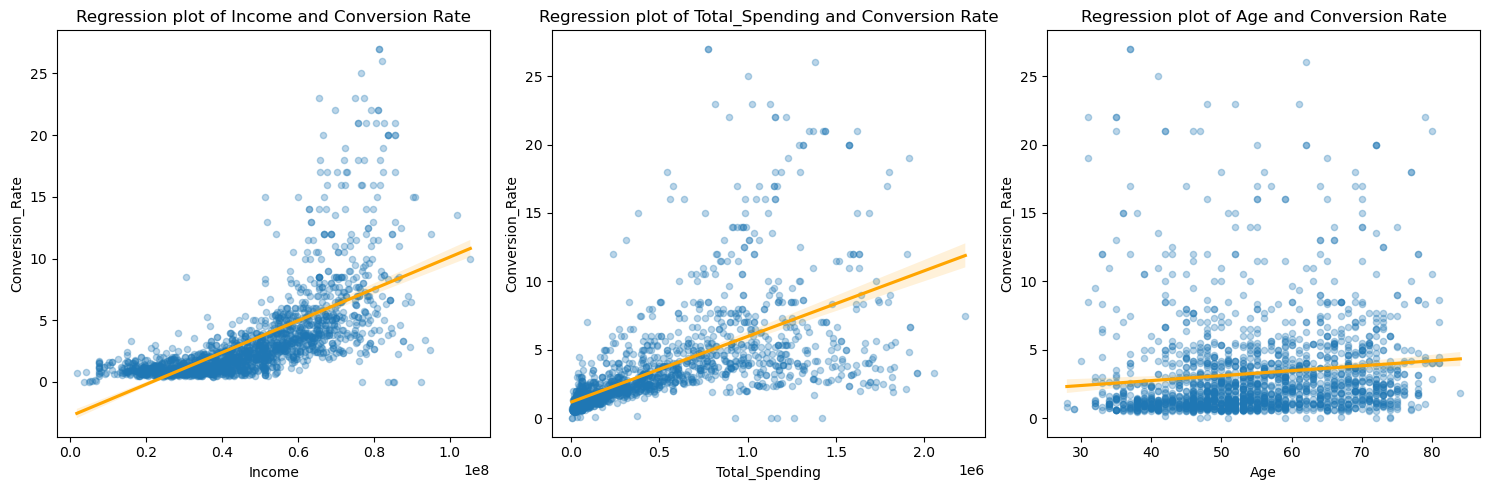

In [32]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df_copy_1[variable[var]], y='Conversion_Rate', data=df_copy_1, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

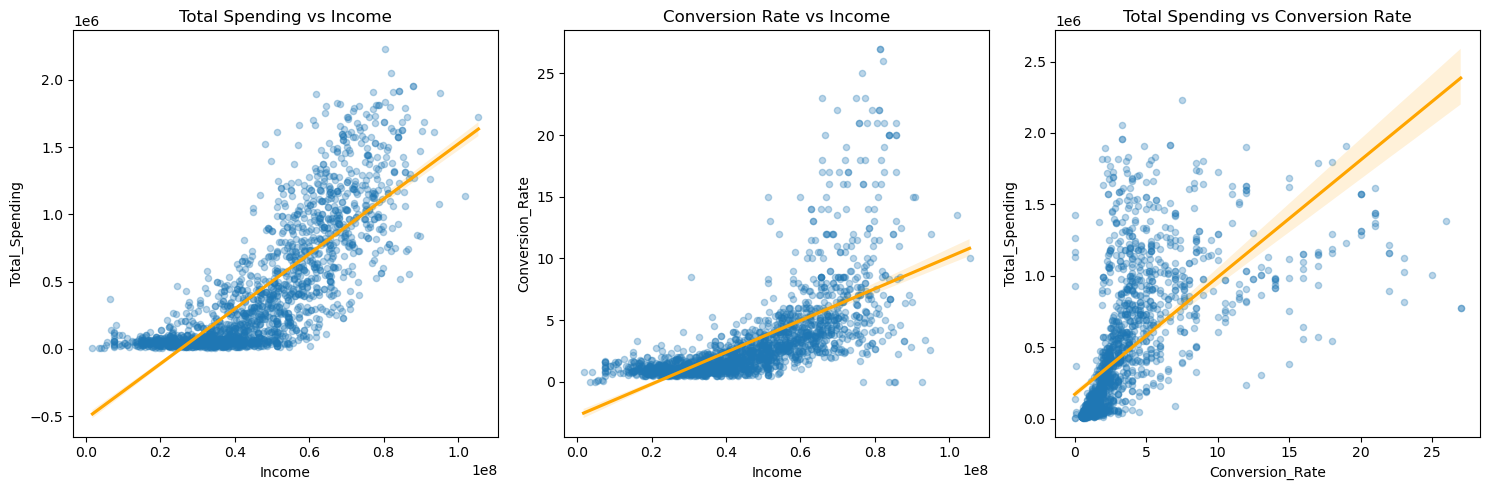

In [33]:
plt.figure(figsize=(15, 5))

# Plot 1: Total Spending vs Income
plt.subplot(1, 3, 1)
sns.regplot(x='Income', y='Total_Spending', data=df_copy_1, scatter_kws={'s':20, 'alpha':0.3}, 
            line_kws={'color':'orange'}).set(title='Total Spending vs Income')

# Plot 2: Conversion Rate vs Income
plt.subplot(1, 3, 2)
sns.regplot(x='Income', y='Conversion_Rate', data=df_copy_1, scatter_kws={'s':20, 'alpha':0.3}, 
            line_kws={'color':'orange'}).set(title='Conversion Rate vs Income')

# Plot 3: Total Spending vs Conversion Rate
plt.subplot(1, 3, 3)
sns.regplot(x='Conversion_Rate', y='Total_Spending', data=df_copy_1, scatter_kws={'s':20, 'alpha':0.3}, 
            line_kws={'color':'orange'}).set(title='Total Spending vs Conversion Rate')

plt.tight_layout()
plt.show()

- Total Spending vs Conversion Rate: Tidak ada hubungan yang jelas antara seberapa banyak yang dihabiskan dan seberapa sering mereka membeli. Jadi, keputusan belanja tidak selalu menghasilkan konversi lebih banyak.
- Conversion Rate vs Income: Ironisnya, tingkat konversi cenderung menurun dengan pendapatan yang lebih tinggi. Jadi, uang tidak selalu membeli kesetiaan customer.
- Conversion Rate vs Age: Tidak ada hubungan linier antara usia customer dan tingkat konversi. Meskipun demikian, distribusi data menunjukkan variasi yang cukup merata di sepanjang rentang usia, menunjukkan bahwa faktor lain lebih berpengaruh dalam menentukan tingkat konversi.
- Total Spending vs Income: Semakin tinggi pendapatan, semakin besar total pengeluaran. Itu artinya, semakin banyak uang, semakin banyak yang bisa dihabiskan.

### Multivariate Analysis

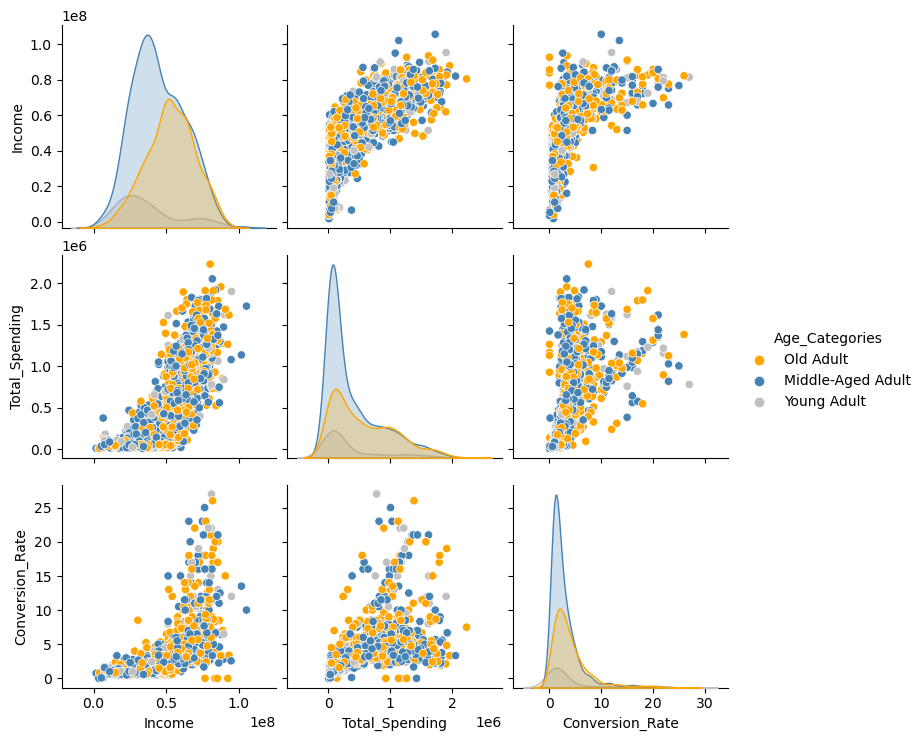

In [34]:
sns.pairplot(df_copy_1[['Income', 'Total_Spending', 'Age_Categories', 'Conversion_Rate']], hue = 'Age_Categories', palette=['orange', 'steelblue','silver'])

- Pada fitur Income, Total_Spending, dan Conversion Rate, tidak terlihat pola atau kelompok usia yang jelas. 
- Distribusi usia cenderung merata dan tidak terkelompok secara signifikan. Hal ini menunjukkan bahwa dalam konteks ini, usia bukan faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi. Faktor seperti pendapatan dan pola pengeluaran memiliki pengaruh yang lebih besar dalam menentukan tingkat konversi customer. Meskipun demikian, penting untuk tetap mempertimbangkan usia dalam strategi pemasaran dan analisis yang lebih mendalam.

# 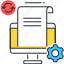 TASK 2: Data Preprocessing

In [35]:
data_prep = df_copy_1.copy()

In [36]:
#education
mapping_education = {'SMA' : 0, 
                     'D3' : 1, 
                     'S1' : 2, 
                     'S2' : 3, 
                     'S3' : 4}

data_prep['education_encd'] = data_prep['Education'].map(mapping_education)

In [37]:
#standarization

data_std = data_prep.copy()
X = data_std.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Categories', 'Dt_Customer'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Membership_Duration,Age,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaign,Conversion_Rate,education_encd
0,-0.035126,0.87058,0.807079,-0.369001,-0.759893,-0.550662,-0.732965,-0.553375,-0.679520,-0.665694,...,0.0,-0.375523,-1.402283,1.308087,1.273574,-1.020052,-0.866644,-0.400534,-0.570359,-0.471204
1,1.326298,-0.95186,-1.024596,-0.783785,0.554474,1.076730,0.236809,2.024394,0.418402,0.121215,...,0.0,-0.375523,0.061345,0.348548,-1.500120,1.002446,0.701813,-0.400534,0.537234,-0.471204
2,-1.096400,0.87058,-1.024596,-0.783785,-0.759893,-0.448950,-0.620759,-0.364181,-0.569728,-0.687552,...,0.0,-0.375523,-1.402283,-1.308837,-0.113273,-0.750385,-0.812198,-0.400534,-0.534806,-0.471204
3,0.608653,0.87058,-1.024596,1.566660,-0.246815,0.873306,0.164677,0.487193,0.747779,-0.468967,...,0.0,-0.375523,-1.402283,-1.047145,-0.113273,0.732780,-0.039487,-0.400534,0.140688,1.488372
4,0.836015,-0.95186,0.807079,-1.129439,0.852186,0.839402,0.004384,-0.600673,1.571220,-0.490825,...,0.0,-0.375523,0.061345,0.174087,-0.113273,1.137279,0.576169,-0.400534,0.105136,0.508584


# 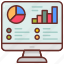 TASK 3: Data Modeling

In [40]:
data_model = X.copy()

In [41]:
from sklearn.decomposition import PCA 

#fit PCA
pca = PCA(n_components = 2)
pca.fit(data_model)

#pca transformed 
data_pca = pca.transform(data_model)

In [42]:
data_pca1 = pd.DataFrame(data_pca)

## Finding The Best Cluster

In [43]:
#mencari nilai k dengan inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

#fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

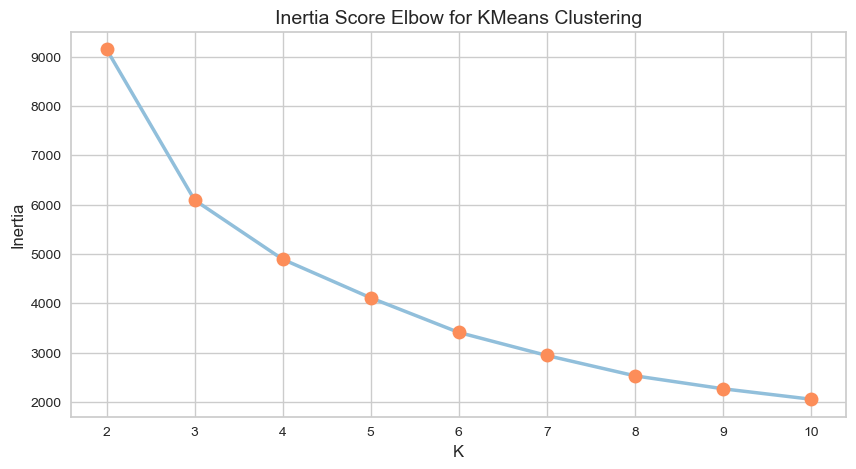

In [44]:
#visualisasi elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

#plot
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

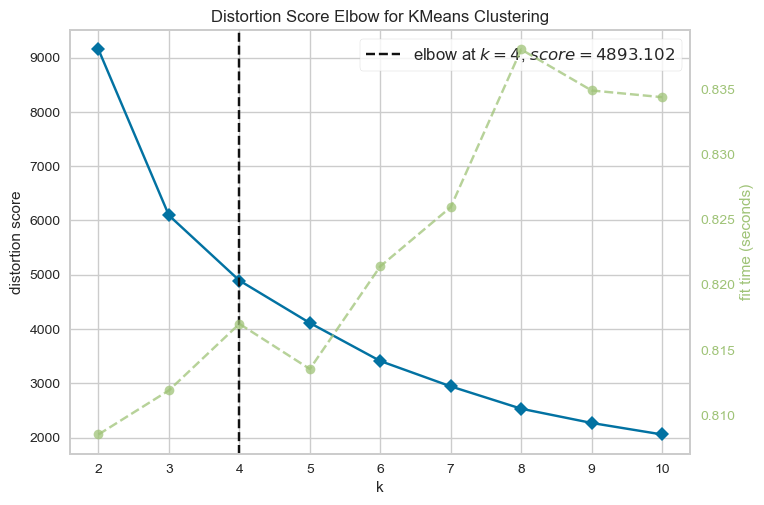

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
#visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

#fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)       
visualizer.show() 

Dari Distortion Score dan Metode Elbow terdapat 4 jumlah cluster terbaik

## Clustering with K-Means

In [46]:
from sklearn.cluster import KMeans

#fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [47]:
data_pca1.head()

,0,1,cluster
0,-2.689035,0.279781,3
1,3.063574,-1.837801,0
2,-2.729608,-1.258710,3
3,0.694788,-0.518106,1
4,2.174626,0.334290,1


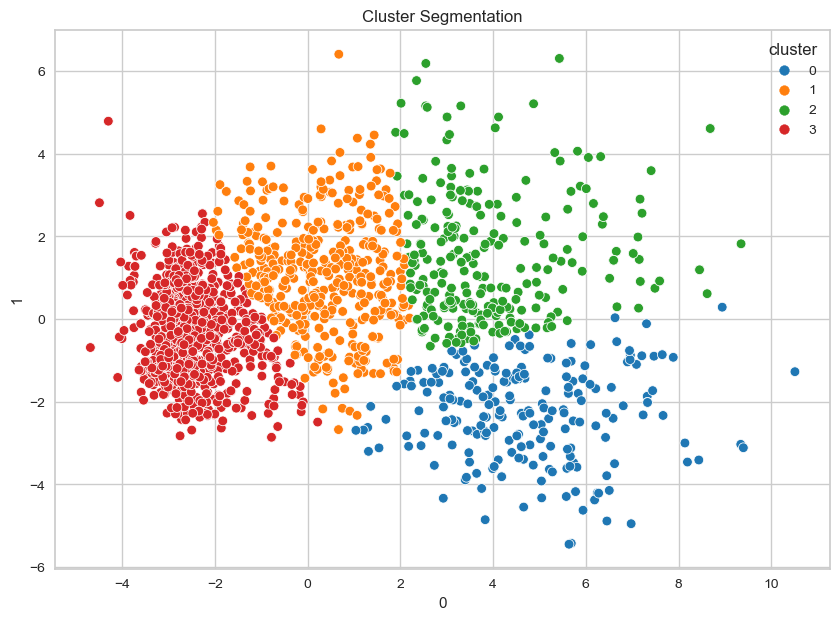

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette='tab10')
plt.title('Cluster Segmentation')
plt.show()

In [49]:
#evaluation

from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

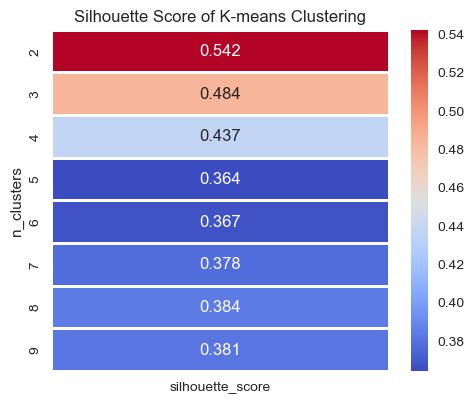

In [50]:
#visualisasi Silhouette Score
visualize_silhouette_layer(data_pca1.drop('cluster', axis=1))

Berdasarkan silhoutte score, jumlah cluster optimal tampaknya adalah 2 cluster (0.542) atau 3 cluster (0.484), karena mereka memberikan silhoutter score tertinggi.

# 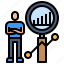 TASK 4: Customer Personality Analysis for Marketing Retargeting

In [51]:
data_prep['Cluster'] = kmeans.labels_

In [52]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'Conversion_Rate','Cluster', 'Age']
data_summary = data_prep[feats]

In [53]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,Conversion_Rate,Age
,median,median,median,median,median,median
Cluster,,,,,,
0,50.0,20.0,1044500.0,71856500.0,8.0,55.0
1,48.0,17.0,424000.0,51445500.0,3.0,59.0
2,50.0,24.0,1073000.0,65196000.0,4.0,60.0
3,49.0,7.0,57000.0,33390000.0,1.0,51.0


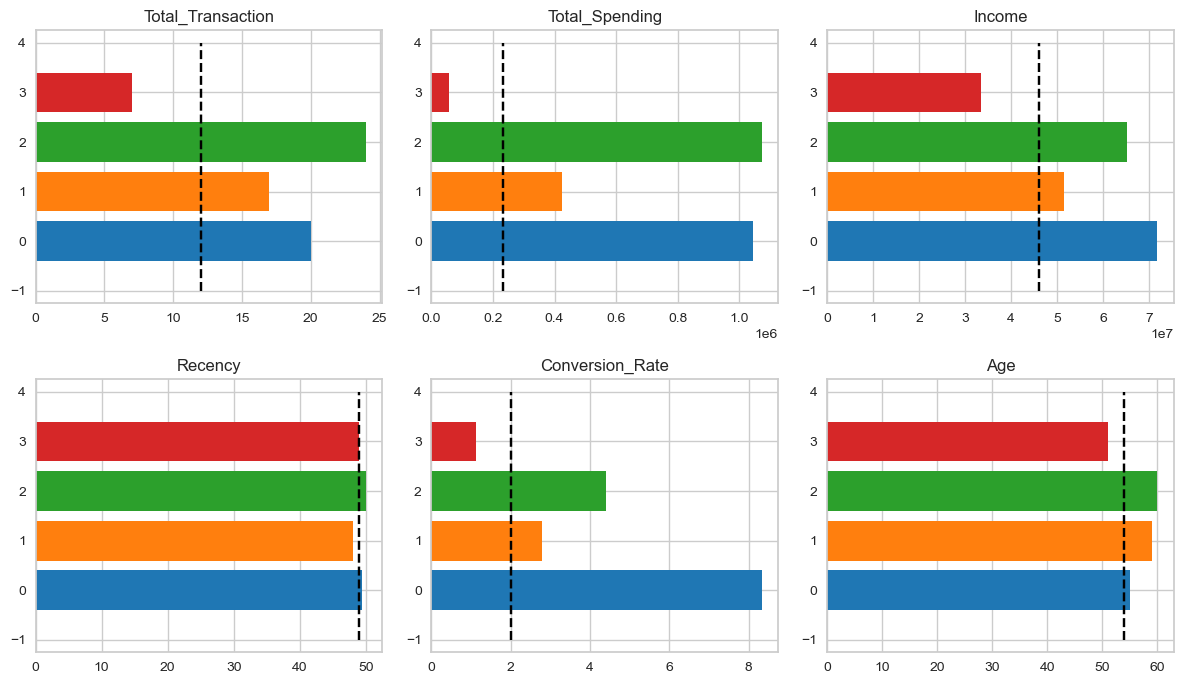

In [54]:
color = sns.color_palette('tab10')

def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(data_prep[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = data_prep.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=color) 
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'Conversion_Rate', 'Age'])
plt.tight_layout()
plt.show()

- Cluster 0: Loyal Customers with Medium Transactions (Loyal Spenders)
   
   Customer di cluster ini cenderung memiliki frekuensi transaksi yang cukup tinggi, menunjukkan bahwa mereka adalah customer setia yang sering bertransaksi. Namun, pengeluaran mereka berada pada tingkat menengah. Dengan pendapatan yang cukup baik, mereka bisa menjadi target potensial untuk peningkatan penjualan melalui promosi yang lebih menarik. Usia yang cenderung lebih tua menunjukkan preferensi dan loyalitas terhadap merek yang telah mereka percayai.
   
- Cluster 1: Younger Customers with Low Transactions (Emerging Users)

    Customer di cluster ini memiliki jumlah transaksi dan pengeluaran yang rendah, menunjukkan bahwa mereka mungkin baru atau kurang sering bertransaksi. Dengan pendapatan yang lebih rendah, mereka mungkin lebih sensitif terhadap harga. Tingkat konversi yang sangat rendah mengindikasikan perlunya strategi pemasaran yang lebih personal dan penawaran yang sesuai dengan anggaran mereka. Usia yang lebih muda menunjukkan potensi untuk jangka panjang jika berhasil menarik loyalitas mereka.
    
- Cluster 2: Premium Customers with High Spending (High Rollers)

    Cluster ini berisi Customer dengan frekuensi transaksi dan pengeluaran yang sangat tinggi, serta pendapatan yang paling tinggi di antara semua cluster. Tingkat konversi yang tinggi menunjukkan bahwa mereka sangat responsif terhadap kampanye pemasaran. Customer ini adalah target utama untuk promosi premium dan layanan eksklusif. Usia mereka yang berada di tengah menunjukkan keseimbangan antara pengalaman dan daya beli yang kuat.
    
- Cluster 3: Most Active Customers with Maximum Transactions (Top Engagers)

    Customer di cluster ini memiliki frekuensi transaksi tertinggi dan pengeluaran yang hampir setara dengan cluster 2. Pendapatan mereka cukup tinggi, namun tingkat konversi mereka sedikit lebih rendah dibandingkan cluster 2. Ini menunjukkan bahwa meskipun mereka sering bertransaksi, mungkin ada ruang untuk meningkatkan efektivitas kampanye pemasaran. Dengan usia yang lebih tua, mereka mungkin menghargai pengalaman dan keandalan yang diberikan oleh merek.

In [55]:
# % total customer setiap Cluster
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,230,12.36
1,1,438,23.54
2,2,269,14.45
3,3,924,49.65


([<matplotlib.axis.XTick at 0x250de7c3750>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

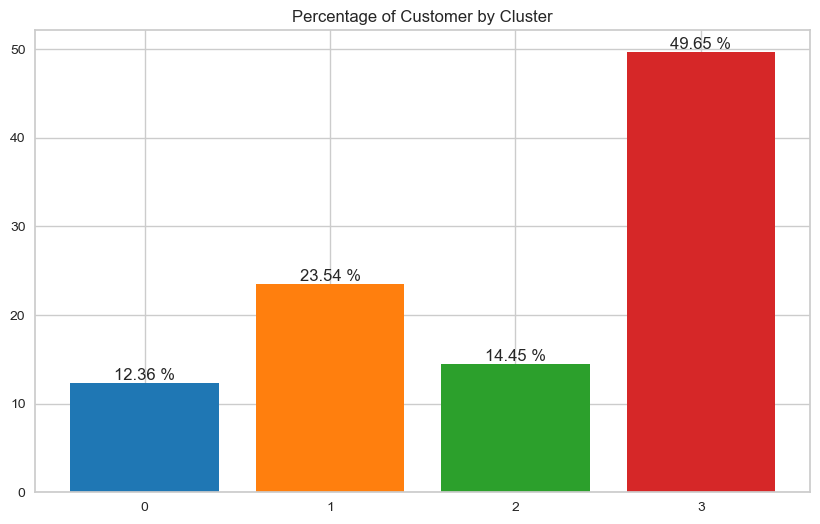

In [56]:
#visualisasi % customer pada setiap Cluster
fig, ax = plt.subplots(figsize=(10,6))

bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'], color=color)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center',va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0,4))

- Mayoritas customer berada di Cluster 1, yaitu Emerging usersu yang memerlukan strategi khusus untuk meningkatkan loyalitas dan transaksi.
- Cluster 2 dan Cluster 3, meskipun lebih kecil, memiliki customer dengan pengeluaran tinggi dan aktivitas transaksi yang intens, sehingga layak untuk fokus pada retensi dan up-sell.
- Cluster 0, meskipun tidak sebesar Cluster 1, menunjukkan potensi besar dalam hal loyalitas yang dapat dioptimalkan lebih lanjut.

In [57]:
variable = ['Recency', 'Total_Transaction', 'Total_Spending', 'Income', 'NumWebVisitsMonth', 'Total_Accepted_Campaign', 'Conversion_Rate', 'Membership_Duration', 
            'Age', 'education_encd']

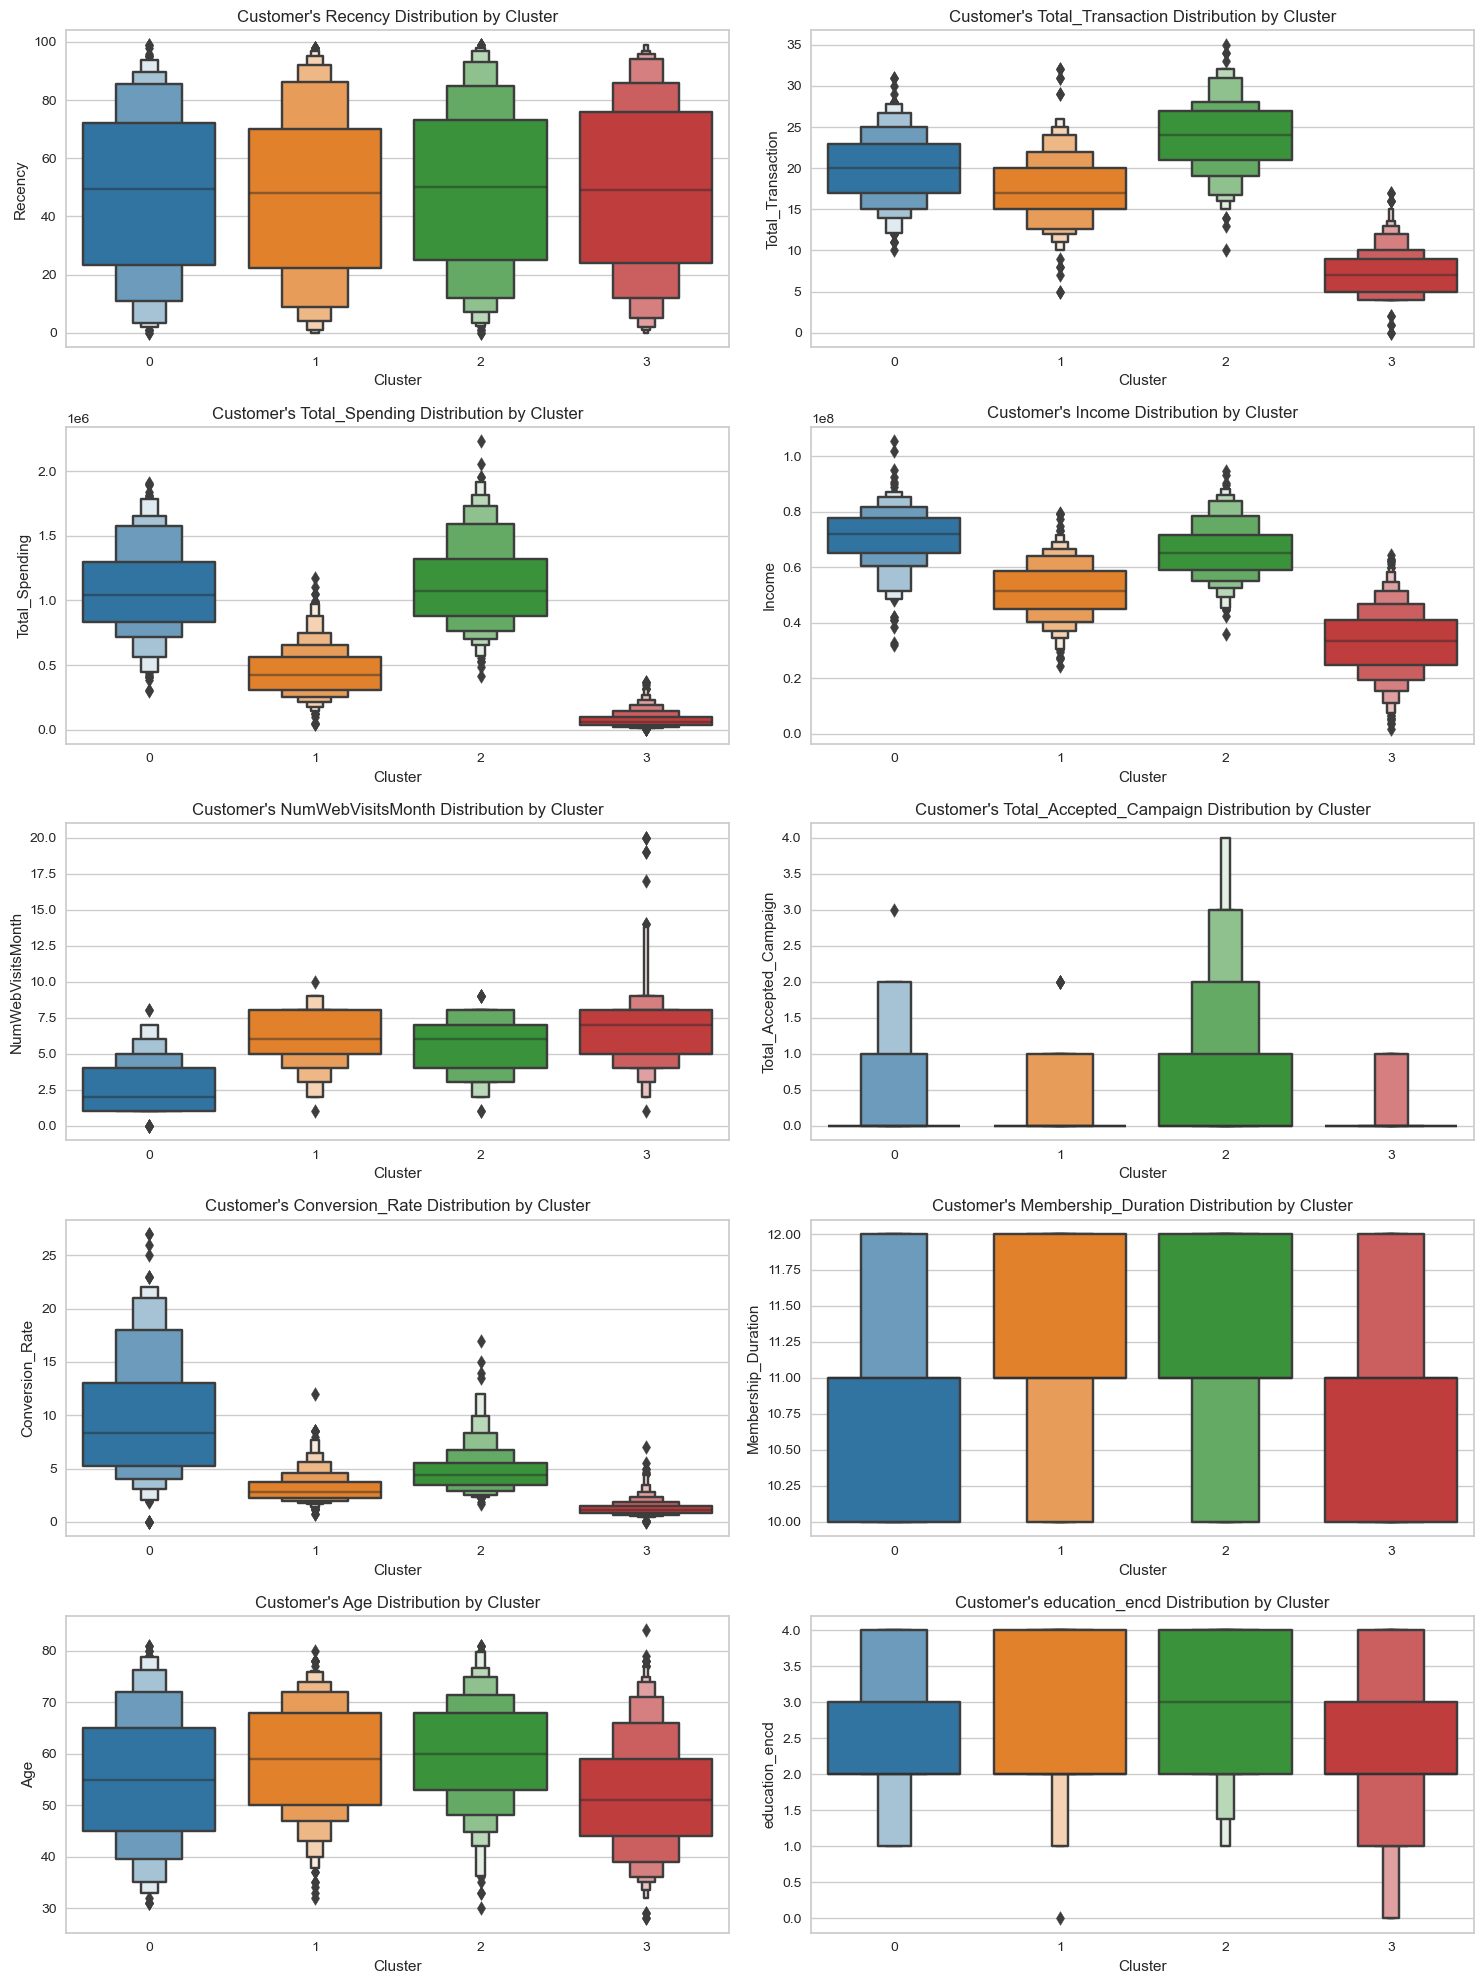

In [58]:
#distribusi pada cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=data_prep[variable[i]], data=data_prep, palette=color).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()

- Customer dalam cluster 0, memiliki jumlah transaksi yang cukup stabil dan pengeluaran yang moderat, dan mereka cenderung lebih tua dan memiliki pendapatan yang relatif tinggi.
- Cluster 1 terdiri dari customer yang lebih muda dengan jumlah transaksi dan pengeluaran yang rendah, sering mengunjungi website tetapi kurang responsif terhadap campaign.
- Cluster 2 memiliki pengeluaran yang sangat tinggi dan respons yang positif terhadap campaign serta tidak terlalu sering mengunjungi website namun memiliki konversi yang tinggi. Pendapatan mereka juga paling tinggi di antara cluster lainnya.
- Cluster 3 sangat aktif dengan jumlah transaksi dan pengeluaran yang maksimal dan usia customer cenderung lebih tua dan memiliki pendapatan yang cukup tinggi.

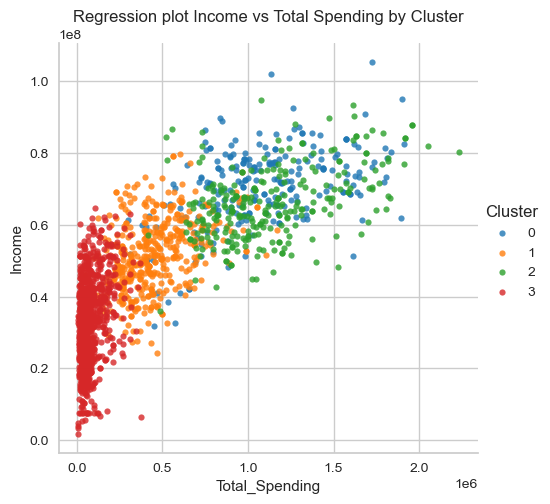

In [59]:
sns.lmplot(y='Income', x='Total_Spending', hue='Cluster', fit_reg=False, data=data_prep, palette=color, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

- Pada cluster 0, titik-titik tersebar dengan pengeluaran berkisar dari rendah hingga sedang, dan pendapatan yang cukup konsisten di level menengah hingga tinggi.
- Pada cluster 1, titik-titik terkonsentrasi di bagian bawah plot, menunjukkan pengeluaran yang rendah dan pendapatan yang relatif lebih rendah.
- Pada cluster 2, titik-titik tersebar di bagian atas kanan plot, menunjukkan pengeluaran yang tinggi dan pendapatan yang sangat tinggi.
- Pada cluster 3, titik-titik tersebar dengan pengeluaran tinggi dan pendapatan yang tinggi, menunjukkan aktivitas transaksi yang sangat aktif.

1. Polarisasi Pendapatan dan Pengeluaran: Terdapat polarisasi yang jelas antara cluster, dengan cluster 2 dan 3 menunjukkan pendapatan dan pengeluaran yang lebih tinggi dibandingkan cluster 0 dan 1.
2. Segmentasi Pasar yang Jelas: Cluster-cluster ini membantu mengidentifikasi segmentasi pasar yang jelas, memungkinkan perusahaan untuk menargetkan kampanye pemasaran yang lebih spesifik dan efektif.
3. Strategi yang Disesuaikan: Perusahaan dapat mengembangkan strategi yang disesuaikan berdasarkan karakteristik dan kebutuhan masing-masing cluster. Misalnya, cluster 2 dapat diberi penawaran premium, sementara cluster 1 dapat diberikan edukasi dan promosi yang lebih mendalam untuk meningkatkan keterlibatan mereka.

# Recommendations

1. Cluster 0: Loyal Customers with Medium Transactions
    
    - Rekomendasi:
       
        Program Loyalitas: Tingkatkan program loyalitas untuk mempertahankan customer ini dan mendorong peningkatan pengeluaran.
       
        Penawaran Khusus: Buat penawaran khusus dan promosi yang menarik untuk mendorong customer melakukan transaksi lebih banyak.

        Personalized Marketing: Gunakan data customer untuk membuat kampanye pemasaran yang dipersonalisasi.
    - Dampak Potensial:

        Meningkatkan Retensi: Customer yang lebih setia dengan tingkat retensi yang lebih tinggi.


        Peningkatan Pengeluaran: Peningkatan jumlah transaksi dan pengeluaran dari customer yang sudah ada.

2. Cluster 1: Younger Customers with Low Transactions
        
    - Rekomendasi:

        Edukasi dan Peningkatan Kesadaran: Edukasi customer mengenai produk/layanan melalui kampanye pemasaran yang mendidik.

        Promosi yang Menarik: Buat promosi dan diskon khusus untuk menarik customer muda ini.


        Engagement Melalui Media Sosial: Gunakan platform media sosial untuk meningkatkan keterlibatan dan kesadaran.

    - Dampak Potensial:

        Meningkatkan Kesadaran dan Keterlibatan: Peningkatan kesadaran dan keterlibatan customer muda.

        Peningkatan Transaksi: Potensi peningkatan jumlah transaksi dari kelompok customer ini.

3. Cluster 2: Premium Customers with High Spending
    - Rekomendasi:

        Penawaran Eksklusif: Buat penawaran eksklusif dan produk premium yang disesuaikan dengan kebutuhan dan preferensi mereka.

        Layanan Khusus: Berikan layanan customer yang lebih personal dan premium.

        Program Penghargaan: Implementasikan program penghargaan untuk mengapresiasi loyalitas dan pengeluaran tinggi mereka.
        
    - Dampak Potensial:

        Meningkatkan Loyalitas dan Pengeluaran: Peningkatan loyalitas dan pengeluaran dari customer premium.
        
        Customer Lifetime Value (CLV) yang Tinggi: Peningkatan nilai seumur hidup customer (CLV).

4. Cluster 3: Most Active Customers with Maximum Transactions
    - Rekomendasi:

        Insentif untuk Aktivitas Transaksi: Berikan insentif untuk mempertahankan aktivitas transaksi yang tinggi.

        Cross-Selling dan Up-Selling: Identifikasi peluang untuk cross-selling dan up-selling produk tambahan.

        Program Referral: Implementasikan program referral untuk memanfaatkan keterlibatan aktif mereka dalam mengundang customer baru.

    - Dampak Potensial:

        Peningkatan Volume Transaksi: Peningkatan volume transaksi melalui insentif dan peluang cross-selling/up-selling.
        
        Akuisisi Customer Baru: Mendapatkan customer baru melalui program referral yang efektif.